### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 500

### Data Cleaning and Feature Engineering

In [2]:
df = pd.read_csv('../data/posts.csv')

df.head(3)

,subreddit,author,title,selftext
0,Eldenring,mrawesome11234,It is almost time my fellow hollows,NaN
1,Eldenring,Yurisanrollrrir,24 Hours yet remain...,NaN
2,Eldenring,GlassedGhost,Your worst nightmares...,NaN


In [3]:
df.isna().sum()

subreddit       0
author          0
title           0
selftext     1090
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  2000 non-null   object
 1   author     2000 non-null   object
 2   title      2000 non-null   object
 3   selftext   910 non-null    object
dtypes: object(4)
memory usage: 62.6+ KB


In [5]:
#converted nulls into empty space. decided to keep since still around 900 posts that can give information to model

df.fillna(' ', inplace=True)

df.isna().sum()

subreddit    0
author       0
title        0
selftext     0
dtype: int64

In [6]:
#combined post title and post body into one variable

df['body'] = df['title'] + str(' ') + df['selftext']

df.head(3)

,subreddit,author,title,selftext,body
0,Eldenring,mrawesome11234,It is almost time my fellow hollows,,It is almost time my fellow hollows
1,Eldenring,Yurisanrollrrir,24 Hours yet remain...,,24 Hours yet remain...
2,Eldenring,GlassedGhost,Your worst nightmares...,,Your worst nightmares...


In [7]:
#removed puncutation from text -- found expression in stackoverflow
df['body'] = df['body'].str.replace(r'[^\w\s]', '')

#set regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['tokenized'] = df['body'].apply(lambda x: tokenizer.tokenize(x))

df.head(3)

/var/folders/j4/fj647cj14gd9kk21c0z8rmm00000gn/T/ipykernel_3972/1280113549.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace(r'[^\w\s]', '')


,subreddit,author,title,selftext,body,tokenized
0,Eldenring,mrawesome11234,It is almost time my fellow hollows,,It is almost time my fellow hollows,"[It, is, almost, time, my, fellow, hollows]"
1,Eldenring,Yurisanrollrrir,24 Hours yet remain...,,24 Hours yet remain,"[24, Hours, yet, remain]"
2,Eldenring,GlassedGhost,Your worst nightmares...,,Your worst nightmares,"[Your, worst, nightmares]"


In [8]:
#added additional stop words to review the name of the games
custom_stopwords = ['elden',
                    'ring',
                    'stardew',
                    'valley',
                    'just',
                    'like',
                    'think',
                    'game',
                    'games',
                   'im',
                   'dont',
                   'ive',
                   'thats',
                   'youre',
                    'play',
                    'playing',
                    'time',
                    'think',
                    'thought',
                   'make',
                   'new',
                   'did',
                   'does',
                   'really',
                   'actually',
                   'sure',
                   'thing',
                   'good',
                   'know',
                   'need',
                   'want',
                   'theres',
                   'didnt']

stop_words = text.ENGLISH_STOP_WORDS.union(custom_stopwords)

#set lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokenized'].apply(lambda word_list:' '.join([lemmatizer.lemmatize(x) for x in word_list]))

#found how to apply lemmatizer through stackoverflow

p_stemmer = PorterStemmer()
df['stemmed'] = df['tokenized'].apply(lambda word_list:' '.join([p_stemmer.stem(x) for x in word_list]))

df.head(3)

,subreddit,author,title,selftext,body,tokenized,lemmatized,stemmed
0,Eldenring,mrawesome11234,It is almost time my fellow hollows,,It is almost time my fellow hollows,"[It, is, almost, time, my, fellow, hollows]",It is almost time my fellow hollow,it is almost time my fellow hollow
1,Eldenring,Yurisanrollrrir,24 Hours yet remain...,,24 Hours yet remain,"[24, Hours, yet, remain]",24 Hours yet remain,24 hour yet remain
2,Eldenring,GlassedGhost,Your worst nightmares...,,Your worst nightmares,"[Your, worst, nightmares]",Your worst nightmare,your worst nightmar


In [9]:
cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(1,2))
#found token_pattern to incorporate any character (emojis) in stackoverflow

P = df['body'] #learn fit to learn the whole dictionary

cvecpost = cvec.fit_transform(P)

postdf = pd.DataFrame(cvecpost.todense(),
                         columns=cvec.get_feature_names())

postdf.head(3)

,0,0 amp,0 chance,0 hope,0150,0150 jumped,02,02 2021,02 chance,02 said,...,zullies newest,zuzu,zuzu city,zweiboy,zweiboy favourite,zweihander,zweihander zweiboy,ʖ,ω,ಠ_ಠ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
games = df.drop(columns=['author', 'title', 'selftext', 'body', 'lemmatized', 'stemmed', 'tokenized'])
games['og_subreddit'] = games['subreddit']
games.drop(columns=['subreddit'], inplace=True)
df2 = pd.concat([postdf, games], axis=1)

elden = df2[df2['og_subreddit'] == 'Eldenring']
stardew = df2[df2['og_subreddit'] == 'StardewValley']

In [11]:
elden.drop(columns=['og_subreddit'], inplace=True)
stardew.drop(columns=['og_subreddit'], inplace=True)

/Users/karenchien/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### EDA - Posts

<AxesSubplot:>

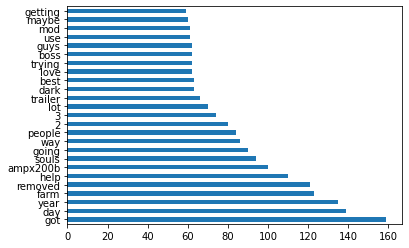

In [12]:
postdf.sum().sort_values(ascending=False).head(25).plot.barh()

In [50]:
eldenoverlap = elden.sum().sort_values(ascending=False).head(1559)

In [51]:
eldenoverlap.shape

(1559,)

In [52]:
eldenoverlapdf = eldenoverlap.to_frame().reset_index()
eldenoverlapdf.rename(columns = {'index' : 'word', 0 : 'count'}, inplace = True)

eldenoverlapdf.head(3)

,word,count
0,removed,95
1,souls,94
2,ampx200b,70


In [54]:
eldenoverlapdf.describe()

,count
count,1559.000000
mean,7.147530
std,8.010746
min,2.000000
25%,3.000000
50%,4.000000
75%,8.000000
max,95.000000


In [55]:
eldenoverlapdf2 = eldenoverlapdf[eldenoverlapdf['count'] > 4]

In [56]:
stardewoverlap = stardew.sum().sort_values(ascending=False).head(1559)

In [57]:
stardewoverlapdf = stardewoverlap.to_frame().reset_index()
stardewoverlapdf.rename(columns = {'index' : 'word', 0 : 'count'}, inplace = True)

stardewoverlapdf.head(3)

,word,count
0,year,123
1,farm,122
2,got,115


In [58]:
stardewoverlapdf.describe()

,count
count,1559.000000
mean,7.788326
std,9.255472
min,2.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,123.000000


In [59]:
stardewoverlapdf2 = stardewoverlapdf[stardewoverlapdf['count'] > 5]

In [60]:
common_words = stardewoverlapdf2[stardewoverlapdf2['word'].isin(eldenoverlapdf2['word'])]

common_words.to_csv('../data/overlappingwords2.csv', index=False)

In [19]:
removedposts = df[df['body'].str.lower().str.contains('removed')]

removedposts['subreddit'].value_counts(normalize=True)

Eldenring        0.783333
StardewValley    0.216667
Name: subreddit, dtype: float64

In [20]:
ampx = df[df['body'].str.lower().str.contains('ampx200b')]

ampx['subreddit'].value_counts(normalize=True)

StardewValley    0.583333
Eldenring        0.416667
Name: subreddit, dtype: float64

### Observations
- Of removed posts, most came from Eldenring
- Specific words connected to gameplay pop up frequently in posts. For Eldenring this was "soul", Stardew Valley was "farm."
- Stardew Valley might be easier to find words in posts since other agricultural words appear such as "spring", "winter," and "fish."

In [21]:
stardewwords = ['fish', 'plant', 'fruit', 'crop', 'seed', 'farm', 'day', 'spring', 'winter', 'summer']
eldenwords = ['soul', 'boss', 'dark']

stardewtest = df[df['body'].str.lower().str.contains('|'.join(stardewwords))]
eldentest = df[df['body'].str.lower().str.contains('|'.join(eldenwords))]

In [22]:
stardewtest['subreddit'].value_counts()

StardewValley    324
Eldenring         76
Name: subreddit, dtype: int64

In [23]:
eldentest['subreddit'].value_counts()

Eldenring        115
StardewValley      4
Name: subreddit, dtype: int64

### Feature Engineering Notes
- By choosing to highlight if gameplay words appear in posts, this can provide meaningful classification for 25% of 2000 posts

In [24]:
df['stardew_keywords'] = df['body'].str.lower().str.contains('|'.join(stardewwords))
df['elden_keywords'] = df['body'].str.lower().str.contains('|'.join(eldenwords))

### Exporting

In [25]:
df.head(3)

,subreddit,author,title,selftext,body,tokenized,lemmatized,stemmed,stardew_keywords,elden_keywords
0,Eldenring,mrawesome11234,It is almost time my fellow hollows,,It is almost time my fellow hollows,"[It, is, almost, time, my, fellow, hollows]",It is almost time my fellow hollow,it is almost time my fellow hollow,False,False
1,Eldenring,Yurisanrollrrir,24 Hours yet remain...,,24 Hours yet remain,"[24, Hours, yet, remain]",24 Hours yet remain,24 hour yet remain,False,False
2,Eldenring,GlassedGhost,Your worst nightmares...,,Your worst nightmares,"[Your, worst, nightmares]",Your worst nightmare,your worst nightmar,False,False


In [26]:
cleandf = df[['subreddit', 'body', 'lemmatized', 'stemmed', 'stardew_keywords', 'elden_keywords']]
cleandf['type'] = 'Posts'

cleandf.head(3)

/var/folders/j4/fj647cj14gd9kk21c0z8rmm00000gn/T/ipykernel_3972/1360790319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['type'] = 'Posts'


,subreddit,body,lemmatized,stemmed,stardew_keywords,elden_keywords,type
0,Eldenring,It is almost time my fellow hollows,It is almost time my fellow hollow,it is almost time my fellow hollow,False,False,Posts
1,Eldenring,24 Hours yet remain,24 Hours yet remain,24 hour yet remain,False,False,Posts
2,Eldenring,Your worst nightmares,Your worst nightmare,your worst nightmar,False,False,Posts


In [27]:
#cleandf.to_csv('../data/cleanposts.csv', index=False)